# Simulation for accounting for individuals

In [23]:
import scipy.stats as stats
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [24]:
num_ind = 10
num_cell_per_ind = 300
beta = 0
ind_intercepts = stats.norm.rvs(scale=2, size=num_ind)
intercept = 10
geno = np.array([0 for i in range(int(num_ind/2))] + [1 for i in range(int(num_ind/2))])

In [25]:
# generate data
data = []
for ind in range(num_ind):
    mu = intercept+beta*geno[ind]+ind_intercepts[ind]
    data.append(stats.norm.rvs(loc=mu, scale=1, size=num_cell_per_ind))

In [26]:
df = pd.DataFrame()
df['expr'] = np.concatenate(data)
df['geno'] = np.repeat(geno, num_cell_per_ind)
df['ind'] = ['donor_' + str(x) for x in np.repeat(range(num_ind), num_cell_per_ind)]
dummy_df = pd.get_dummies(df, drop_first=True)

In [27]:
LinearRegression().fit(df[['geno']], df['expr'].values).coef_

array([-0.33081874])

In [28]:
avged = df.groupby(['geno', 'ind'])['expr'].mean().reset_index(name='mean').merge(df.groupby(['geno', 'ind']).size().reset_index(name='count'))

In [29]:
LinearRegression().fit(avged[['geno']], avged['mean']).coef_

array([-0.33081874])

In [30]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [31]:
smf.ols("expr ~ geno", df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   expr   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     15.82
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           7.14e-05
Time:                        20:34:38   Log-Likelihood:                -6725.6
No. Observations:                3000   AIC:                         1.346e+04
Df Residuals:                    2998   BIC:                         1.347e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9232      0.059    168.717      0.000       9.808      10.039
geno          -0.3308      0.083     -3.977      0.000      -0.494      -0.168
==============================================================================
Omnibus:                      281.114   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.417
Skew:                           0.210   Prob(JB):                     3.49e-23
Kurtosis:                       2.193   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
smf.mixedlm("expr ~ geno", df, groups=df["ind"]).fit().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: expr      
No. Observations: 3000    Method:             REML      
No. Groups:       10      Scale:              0.9652    
Min. group size:  300     Log-Likelihood:     -4237.7919
Max. group size:  300     Converged:          Yes       
Mean group size:  300.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      9.923    1.027  9.665 0.000  7.911 11.936
geno          -0.331    1.452 -0.228 0.820 -3.177  2.515
Group Var      5.268    2.682                           
========================================================

"""

In [33]:
dummy_df.iloc[:, 1:]

,geno,ind_donor_1,ind_donor_2,ind_donor_3,ind_donor_4,ind_donor_5,ind_donor_6,ind_donor_7,ind_donor_8,ind_donor_9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,1,0,0,0,0,0,0,0,0,1
2996,1,0,0,0,0,0,0,0,0,1
2997,1,0,0,0,0,0,0,0,0,1
2998,1,0,0,0,0,0,0,0,0,1


In [34]:
sm.add_constant(dummy_df.iloc[:, 1:])

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,geno,ind_donor_1,ind_donor_2,ind_donor_3,ind_donor_4,ind_donor_5,ind_donor_6,ind_donor_7,ind_donor_8,ind_donor_9
0,1.0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2995,1.0,1,0,0,0,0,0,0,0,0,1
2996,1.0,1,0,0,0,0,0,0,0,0,1
2997,1.0,1,0,0,0,0,0,0,0,0,1
2998,1.0,1,0,0,0,0,0,0,0,0,1


In [35]:
sm.OLS(dummy_df['expr'], sm.add_constant(dummy_df.iloc[:, 1:])).fit().summary()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   expr   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1468.
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:35:04   Log-Likelihood:                -4198.7
No. Observations:                3000   AIC:                             8417.
Df Residuals:                    2990   BIC:                             8477.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8129      0.057    137.742      0.000       7.702       7.924
geno            1.4829      0.052     28.639      0.000       1.381       1.584
ind_donor_1    -0.9261      0.080    -11.545      0.000      -1.083      -0.769
ind_donor_2     5.1388      0.080     64.062      0.000       4.981       5.296
ind_donor_3     1.1335      0.080     14.131      0.000       0.976       1.291
ind_donor_4     5.2053      0.080     64.891      0.000       5.048       5.363
ind_donor_5     0.0867      0.052      1.674      0.094      -0.015       0.188
ind_donor_6    -0.4452      0.052     -8.599      0.000      -0.547      -0.344
ind_donor_7     2.5637      0.052     49.512      0.000       2.462       2.665
ind_donor_8     0.7013      0.052     13.544      0.000       0.600       0.803
ind_donor_9    -1.4235      0.052    -27.493      0.000      -1.525      -1.322
==============================================================================
Omnibus:                        2.634   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.502
Skew:                           0.025   Prob(JB):                        0.286
Kurtosis:                       2.868   Cond. No.                     3.03e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.58e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### sampling for permutation

In [11]:
expr = stats.norm.rvs(size=1000)

In [12]:
p1 = [0.4, 0.5, 0.1]
p2 = [0.4, 0.1, 0.5]
num_trial = 30000
p1_coefs = np.zeros(num_trial)
p2_coefs = np.zeros(num_trial)
for trial in range(num_trial):
    tx1 = np.random.choice([0, 1, 2], p=p1, size=1000)
    tx2 = np.random.choice([0, 1, 2], p=p2, size=1000)
    
    p1_coefs[trial] = stats.linregress(tx1, expr)[0]
    p2_coefs[trial] = stats.linregress(tx2, expr)[0]

<AxesSubplot:ylabel='Density'>

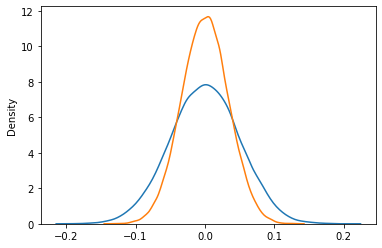

In [13]:
sns.kdeplot(p1_coefs)
sns.kdeplot(p2_coefs)